## Постановка задачи

Рассматривается модель маятника с вязким трением:\
$ml^2\ddot{\phi}+b\dot{\phi}+mgl\sin{\phi}=0$,  \
где  
- $\phi$ — отклонение,  
- $l$ — длина стержня,  
- $m$ — точечная масса,
- $b$ — коэффициент, характеризующий вязкое трение,
- $g$ — ускорение свободного падения.

Сделаем предположение о малости колебаний => $\sin(\phi)\approx \phi$\
Обозначим $2\beta=\frac{b}{ml^2}$, $\omega_0^2=\frac{g}{l}$

Получим итоговое уравнение колебаний:\
$\ddot{\phi}+2\beta\dot{\phi}+\omega_0^2\phi=0$

Необходимо:
1. Решить уравнение численно с помощью `scipy.integrate.odeint`
2. Построить графики $\phi(t)$ и фазовый портрет $(\phi, \dot{\phi})$
3. Изучить влияние β на форму колебаний

Сведем задачу к системе двух дифференциаьных уравнений первого порядка.\
Пусть $x=\phi$, $y=\dot{\phi}$\
Соответствующая система будет иметь вид:\
$\begin{cases}
\dot{x}=y\\
\dot{y}= -\omega_0^2 x -2\beta y
\end{cases}$


In [39]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

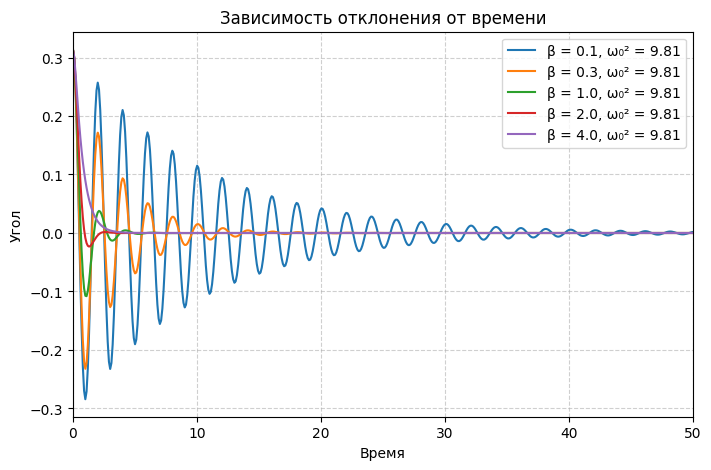

In [ ]:
def func(z,t,omega02=9.81, beta=0.5):
    x,y = z
    f1=y
    f2=-2*beta*y-omega02*x
    return [f1,f2]

def find(t, phi):
    phi0 = abs(phi[0])
    for i in range(len(t)-2, -1, -1):
        if abs(phi[i]) > phi0/2:
            t1, t2 = t[i], t[i+1]
            p1, p2 = abs(phi[i]), abs(phi[i+1])
            frac = (phi0/2 - p2) / (p1 - p2)
            return t2 + frac * (t1 - t2)

def find_picks(t,phi):
    t_picks=[]
    phi_picks=[]
    L=len(t)
    for k in range(L-2):
        if phi[k]<phi[k+1] and phi[k+1]>phi[k+2]:
            t_picks.append(t[k+1])
            phi_picks.append(phi[k+1])
        if phi[k]>phi[k+1] and phi[k+1]<phi[k+2]:
            t_picks.append(t[k+1])
            phi_picks.append(phi[k+1])
    return t_picks, phi_picks

data=[]

x0=np.pi/10
y0=0

t=np.linspace(0,50,500)


betas = [0.1, 0.3, 1.0, 2.0, 4.0]
omegas = [9.81]

plt.figure(figsize=(8,5))

for beta in betas:
    for omega02 in omegas:
        sol=integrate.odeint(func,[x0,y0],t,args=(omega02,beta))
        phi, dphi = sol.T
        t_picks, phi_picks = find_picks(t,phi)
        plt.plot(t,phi, label=f"β = {beta}, ω₀² = {omega02}")
        #plt.plot(t_picks,phi_picks,'o')
        data.append({
        "β": beta,
        "ω₀²": omega02,
        "T_half - numeric": find(t,phi),
        "T_half - theory":np.log(2)/beta
        
        })

plt.xlabel('Время')
plt.ylabel('Угол')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 50)
plt.title('Зависимость отклонения от времени')
plt.legend()


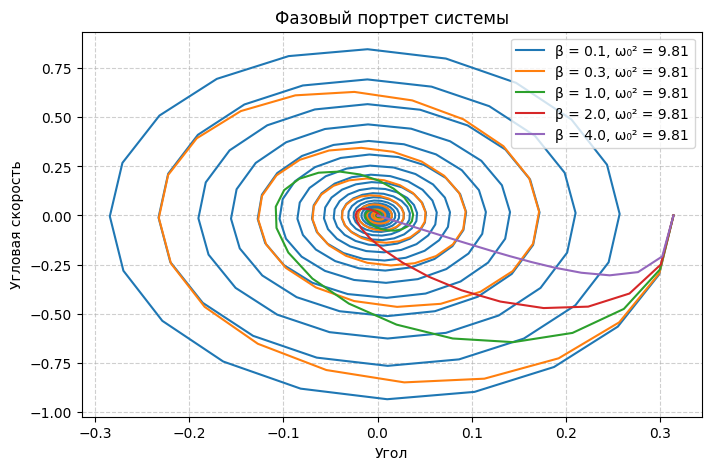

In [60]:

plt.figure(figsize=(8,5))

for beta in betas:
    for omega02 in omegas:
        sol=integrate.odeint(func,[x0,y0],t,args=(omega02,beta))
        phi, dphi = sol.T
        plt.plot(phi,dphi, label=f"β = {beta}, ω₀² = {omega02}")

plt.xlabel('Угол')
plt.ylabel('Угловая скорость')
plt.grid(True, linestyle='--', alpha=0.6)
#plt.xlim(0, 50)
plt.title('Фазовый портрет системы')
plt.legend()



In [61]:
df = pd.DataFrame(data)
print(df)

     β   ω₀²  T_half - numeric  T_half - theory
0  0.1  9.81          6.147939         6.931472
1  0.3  9.81          2.141449         2.310491
2  1.0  9.81          0.380096         0.693147
3  2.0  9.81          0.442826         0.346574
4  4.0  9.81          0.628327         0.173287


## Вывод
В численном эксперименте была исследована зависимость времени уменьшения амплитуды до половины начального значения от коэффициента вязкого трения β.
Полученные результаты показывают, что при слабом затухании зависимость $T ~ \frac{1}{\beta}$ подтверждается, однако при переходе к критическому и апериодическому режимам формула теряет применимость.
Таким образом, эксперимент подтверждает теоретические представления о характере колебаний затухающего гармонического осциллятора.